# Convolutional neural network with Keras 

In this demo, we will train and test a CNN model on the CIFAR10 dataset using Keras.

## 1. Load dataset

The following code snippet will download the data, load it into memory, and convert pixel values to [0, 1].

In [ ]:
from keras.datasets import cifar10

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


## 2. Show a few training examples and its label

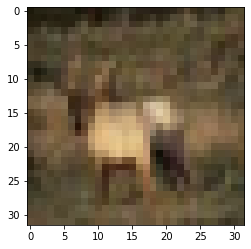

deer


In [ ]:
import matplotlib.pyplot as plt

# List of label strings for CIFAR10
label_str = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

img_id = 3
image = X_train[img_id]
label = Y_train[img_id]

plt.imshow(image)
plt.show()
print(label_str[label[0]])

## 3. Convert label vectors into one-hot encodings

In [ ]:
from tensorflow.keras.utils import to_categorical
 
Y_train = to_categorical(Y_train, num_classes=len(label_str))
Y_test = to_categorical(Y_test, num_classes=len(label_str))

## 4. Define the CNN model

We can add convolutional layers using the Conv2D class and max pooling layer using the MaxPooling2D class. So this CNN model contains:
*   2 convolutional layers (each with 32 3x3 filters)
*   1 max pooling layer with a 2x2 filter
*   The resulting tensor is flattened into a vector
*   The flattened vector is put through an MLP with 1 hidden layer (128 hidden nodes)



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()

input_shape=(32, 32, 3)
model.add(Conv2D(
   filters=32,
   kernel_size=(3,3),
   strides=(1,1),
   padding="same", input_shape = input_shape
))
 
model.add(Conv2D(
   filters=32,
   kernel_size=(3,3),
   strides=(1,1),
   padding="same"
))

model.add(MaxPooling2D(
pool_size=(2,2),
strides=None,
padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))





## 5. Compile the model

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

## 6. Train the model

In [ ]:
model.fit(X_train, Y_train, epochs=30, batch_size=128)

Epoch 1/30
391/391 [==============================] - 6s 14ms/step - loss: 1.9762 - accuracy: 0.2956
Epoch 2/30
391/391 [==============================] - 5s 14ms/step - loss: 1.7320 - accuracy: 0.3942
Epoch 3/30
391/391 [==============================] - 6s 14ms/step - loss: 1.6105 - accuracy: 0.4379
Epoch 4/30
391/391 [==============================] - 5s 14ms/step - loss: 1.5112 - accuracy: 0.4751
Epoch 5/30
391/391 [==============================] - 5s 14ms/step - loss: 1.4310 - accuracy: 0.5024
Epoch 6/30
391/391 [==============================] - 5s 14ms/step - loss: 1.3594 - accuracy: 0.5251
Epoch 7/30
391/391 [==============================] - 6s 14ms/step - loss: 1.3015 - accuracy: 0.5463
Epoch 8/30
391/391 [==============================] - 5s 14ms/step - loss: 1.2404 - accuracy: 0.5685
Epoch 9/30
391/391 [==============================] - 6s 14ms/step - loss: 1.1830 - accuracy: 0.5887
Epoch 10/30
391/391 [==============================] - 6s 14ms/step - loss: 1.1326 - accura

## 7. Evaluate the trained model on test set

In [ ]:
_, accuracy = model.evaluate(X_test, Y_test)

print(accuracy)

313/313 [==============================] - 2s 5ms/step - loss: 1.2008 - accuracy: 0.6285
0.6284999847412109
